In [5]:
import os
import pandas as pd

In [3]:
s = os.path.join('./data', 'iris.data')
s

'./data/iris.data'

In [6]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [7]:
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [55]:
import matplotlib.pyplot as plt
import numpy as np

Convert the labels to binary , -1 for 'Iris-setosa' and 1 for 'Iris-versicolor'

In [56]:
# Select setosa nd veriscolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Extract sepal length and petal length

In [57]:
X = df.iloc[0:100, [0,2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

Plot the data

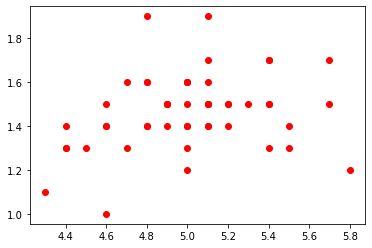

In [58]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

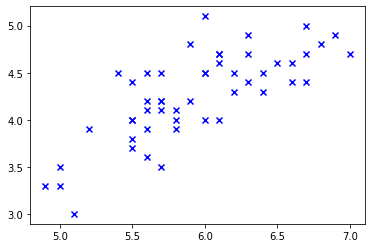

In [59]:
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

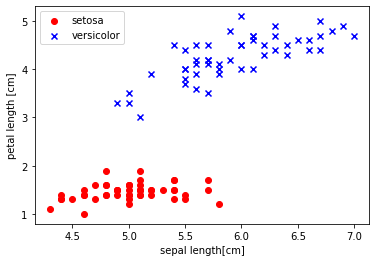

In [60]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Train the Perceptron

In [61]:
from perceptron import Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)


10
10


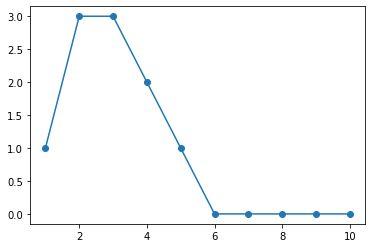

In [62]:
import matplotlib.pyplot as plt
ppn.errors_
print(len(range(1, len(ppn.errors_)+1)))
print(len(ppn.errors_))
# plt.plot(range(1,11), [1,2,3])
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# plt.plot(range(1,3), [1,2])

We can see from the preceding plot, our percepton converged after the sixth epoch and should now be able to classify the traning examples prefectly.

Implemting a small convenience function to visualize the decison boundaries for two-dimensional datasets.

In [68]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    #setup marker generatoe and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decison surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution) )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y= X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx],
                    label=cl,edgecolor='black')

    

In [67]:
print(X[:0])

/tmp/ipykernel_1691/2938769297.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


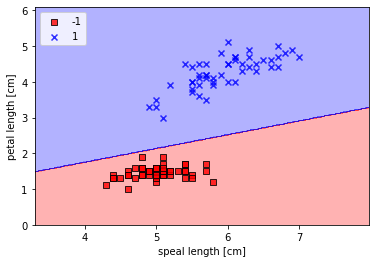

In [69]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('speal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()